# Prepare data for training
## Second level, tree classes: SLOWLY, MODERATELY, FAST

In [46]:
import pandas as pd
from _datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#df = pd.read_csv('20201125_catalogueSampleSource.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
#df = pd.read_csv('20201211_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
#df = pd.read_csv('20201216_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
#df = pd.read_csv('20210106_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
# df = pd.read_csv('20210116_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
df = pd.read_csv('dataset/20210604_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])

df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet
0,MAYO,Acute kidney failure,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...
1,MAYO,Systemic mastocytosis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis..."
2,MAYO,Plague,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...
3,MAYO,Dermatographia,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an..."
4,NHS,Epiglottitis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...


In [48]:
df = df.query("fr0 != 'NONE'")
df = df.query("fr0 != 'PERMANENT'")

In [49]:
# df.loc[df['fr3'].isnull(),'fr3f'] = ''
# df.loc[df['fr3'].notnull(), 'fr3f'] = ' *'

# df.loc[df['fr6'].isnull(),'fr6f'] = ''
# df.loc[df['fr6'].notnull(), 'fr6f'] = ' *'

# df.head()

In [50]:
#df['reviewedTag'] = df.fr0 + (' ' + df.fr1).fillna('')#+ (' ' + df.fr2).fillna('') + df.fr3f+ (' ' + df.fr4).fillna('')+ (' ' + df.fr5).fillna('')+ df.fr6f+ (' ' + df.fr7).fillna('')
#print(df.reviewedTag[0:3])
df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet
0,MAYO,Acute kidney failure,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...
1,MAYO,Systemic mastocytosis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis..."
2,MAYO,Plague,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...
3,MAYO,Dermatographia,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an..."
4,NHS,Epiglottitis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...


In [51]:
df.info()
df.fr1.value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 408
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     409 non-null    object 
 1   condition  409 non-null    object 
 2   fr0        409 non-null    object 
 3   fr1        409 non-null    object 
 4   fr2        409 non-null    object 
 5   fr3        409 non-null    float64
 6   fr4        409 non-null    object 
 7   fr5        409 non-null    object 
 8   fr6        409 non-null    object 
 9   fr7        409 non-null    object 
 10  Sentence   409 non-null    object 
 11  CEsnippet  407 non-null    object 
dtypes: float64(1), object(11)
memory usage: 41.5+ KB


MODERATELY    165
SLOWLY        127
FAST          117
Name: fr1, dtype: int64

In [52]:
df.drop_duplicates(subset=['Sentence'], keep = "first", inplace = True)
df.info()
df.fr1.value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 408
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     405 non-null    object 
 1   condition  405 non-null    object 
 2   fr0        405 non-null    object 
 3   fr1        405 non-null    object 
 4   fr2        405 non-null    object 
 5   fr3        405 non-null    float64
 6   fr4        405 non-null    object 
 7   fr5        405 non-null    object 
 8   fr6        405 non-null    object 
 9   fr7        405 non-null    object 
 10  Sentence   405 non-null    object 
 11  CEsnippet  403 non-null    object 
dtypes: float64(1), object(11)
memory usage: 41.1+ KB


MODERATELY    162
SLOWLY        126
FAST          117
Name: fr1, dtype: int64

In [53]:
df['newTag'] = df['fr1']
col = ['source','condition','CEsnippet','Sentence','newTag']
df = df[col]

df.columns
df.head()

,source,condition,CEsnippet,Sentence,newTag
0,MAYO,Acute kidney failure,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...,FAST
1,MAYO,Systemic mastocytosis,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis...",FAST
2,MAYO,Plague,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...,FAST
3,MAYO,Dermatographia,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an...",FAST
4,NHS,Epiglottitis,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...,FAST


In [54]:
df.to_csv('dataset/'+str(date.today())+'_datasetSecondLevel.csv', index = False)

Text(0.5, 1.0, 'Number of sentences per class')

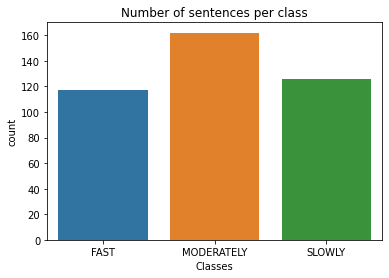

In [55]:
sns.countplot(x=df.newTag, data=df)
plt.xlabel('Classes')
plt.title('Number of sentences per class')

In [56]:
p = df['newTag'].value_counts()#.to_dict()
q = df['newTag'].value_counts(normalize=True)
r = pd.concat([p.rename('Count'),q.rename('Proportion')],axis=1)
print(r)

            Count  Proportion
MODERATELY    162    0.400000
SLOWLY        126    0.311111
FAST          117    0.288889
